In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from tqdm.notebook import tqdm

In [2]:
data = pd.read_csv('./vaccination.csv').to_numpy()

In [3]:
x,f_cum,f = data[:,0],data[:,1],data[:,2]

In [4]:
x = x[:,np.newaxis]
f = f[:,np.newaxis]

In [8]:
x_miss = []
for i in range(x.shape[0]-1):
    if x[i+1][0]-x[i][0] > 1:
        x_miss.append((x[i]+x[i+1])//2)
x_miss = np.asarray(x_miss)
# print(x_miss)

In [5]:
poly_features= PolynomialFeatures(degree=3)
model = LinearRegression()

In [6]:
x_poly = poly_features.fit_transform(x)
model.fit(x_poly, f)
f_poly_pred = model.predict(x_poly)

In [9]:
y = f_poly_pred - f

In [10]:
x_poly_miss = poly_features.fit_transform(x_miss)
f_poly_miss = model.predict(x_poly_miss)

In [11]:
mean_n,sigma_n = 0,0.1

In [12]:
def kernel(a, b, sigma, l):
    dist = a**2 + (b**2).T - 2*(b.T)*a
    kr = sigma**2*np.exp(-dist/(2*l**2))
    return kr

In [13]:
min_mse = 1e19
best_l = 10
for l in tqdm(range(1,30)):
    kr = kernel(x.reshape(-1,1), x.reshape(-1,1), y.std(), l)
    k1 = kernel(x_miss.reshape(-1,1), x, y.std(), l)
    k2 = np.mat((kr + sigma_n*np.eye(kr.shape[0])))**(-1)
    k3 = np.matmul(k2,y)
    mu = np.matmul(k1,k3)
    mse = 0.0
    for idx,xi in enumerate(x_miss):
        mean_inter = (y[xi-1] + y[xi+1])/2
        mse += (mean_inter - mu[idx])**2
    if min_mse > mse:
        min_mse = mse
        best_l = l
        print(best_l, mse, mu.mean())

  0%|          | 0/29 [00:00<?, ?it/s]

1 [[4.1636915e+12]] 122578.45033282958
6 [[3.71674057e+12]] 223139.2
7 [[3.08092199e+12]] 243096.0
8 [[2.92829901e+12]] 252504.8
9 [[2.77490622e+12]] 266023.6


In [14]:
l = best_l
kr = kernel(x.reshape(-1,1), x.reshape(-1,1), y.std(), l)
k1 = kernel(x_miss.reshape(-1,1), x, y.std(), l)
k2 = np.linalg.inv(kr + (sigma_n**2)*np.eye(kr.shape[0]))
k3 = np.matmul(k2,y)
mu = np.matmul(k1,k3)

In [15]:
print(mu, mu.shape)

[[ 471040.]
 [-241728.]
 [ 130048.]
 [1430016.]
 [-450560.]
 [ 344064.]
 [ -40960.]
 [-253952.]
 [ 643072.]
 [ 597504.]] (10, 1)


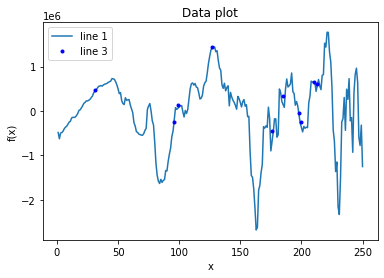

In [16]:
plt.plot(x, y, label = "line 1")
# plt.plot(x, f_poly_pred, label = "line 2")
plt.plot(x_miss, mu, 'b.', label = "line 3")

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('f(x)')
# giving a title to my graph
plt.title('Data plot')
plt.legend()
plt.show()

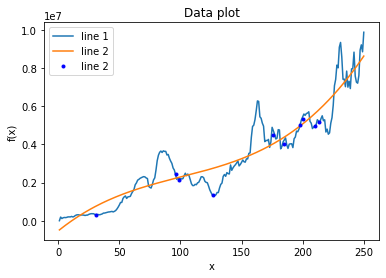

In [17]:
plt.plot(x, f, label = "line 1")
plt.plot(x, f_poly_pred, label = "line 2")
plt.plot(x_miss, f_poly_miss - mu, 'b.', label = "line 2")

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('f(x)')
# giving a title to my graph
plt.title('Data plot')
plt.legend()
plt.show()

In [18]:
k_miss = kernel(x_miss.reshape(-1,1), x_miss.reshape(-1,1), y.std(), l)
k4 = kernel(x, x_miss.reshape(-1,1), y.std(), l)

sigma_miss = k_miss + (sigma_n**2)*np.eye(k_miss.shape[0]) - np.dot(k1,k2).dot(k4)

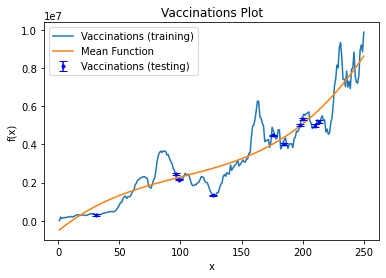

In [41]:
plt.plot(x, f, label = "Vaccinations (training)")
plt.plot(x, f_poly_pred, label = "Mean Function")
plt.errorbar(x_miss, f_poly_miss - mu,yerr=np.sqrt(abs(sigma_miss.diagonal())), fmt='b.',capsize=4, label = "Vaccinations (testing)")

# naming the x axis
plt.xlabel('x')
# naming the y axis
plt.ylabel('f(x)')
# giving a title to my graph
plt.title('Vaccinations Plot')
plt.legend()
plt.show()

In [37]:
x

array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
       [ 72],
      

In [38]:
x_miss

array([[ 31],
       [ 96],
       [ 99],
       [127],
       [176],
       [185],
       [198],
       [200],
       [210],
       [213]])